In [1]:
import sys

sys.path.insert(0, '/home/lara/code/umap_var')

In [4]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import umap 
import umap_var as umapp
import utils as u
from sklearn.datasets import load_boston

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
X = (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True)

In [5]:
reducer = umap.UMAP(init="random")

In [6]:
embedding = reducer.fit_transform(X)

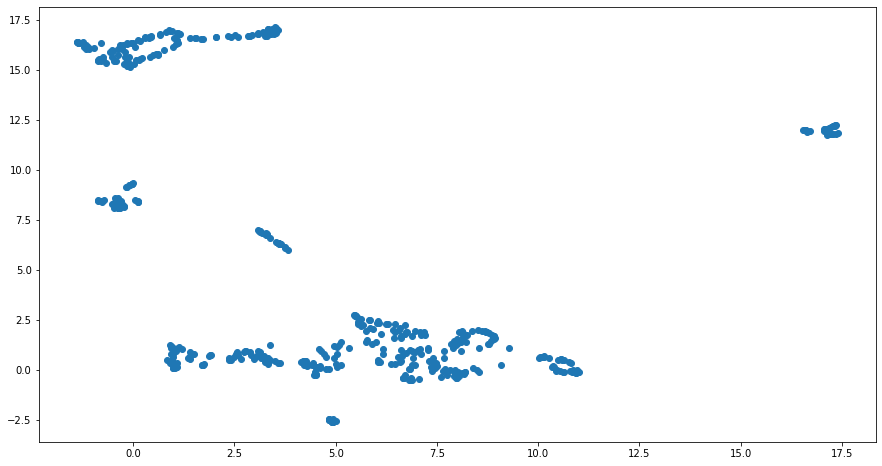

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(embedding[:, 0], embedding[:, 1], 'o')

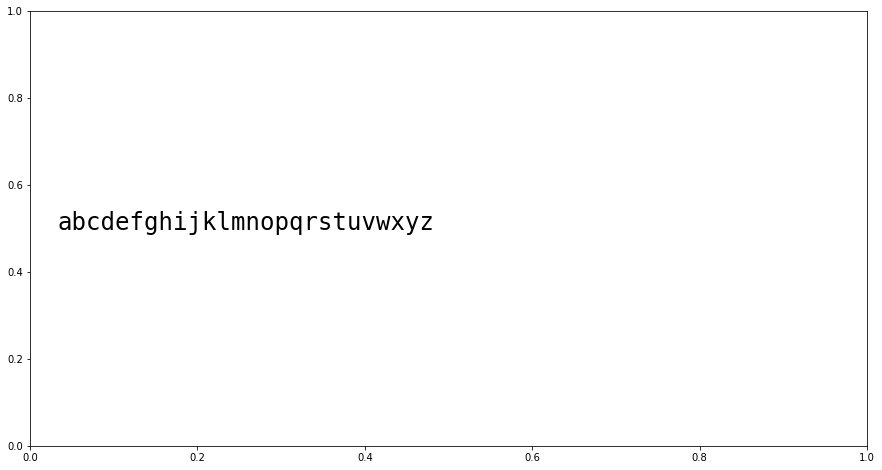

In [4]:
fig = plt.figure(figsize=(15,8))
plt.subplot()
txt = fig.text(0.15, 0.5, 'abcdefghijklmnopqrstuvwxyz', fontsize=24, family='monospace')

In [5]:
renderer = fig.canvas.get_renderer()
bbox = txt.get_window_extent(renderer)
bbox

Bbox([[162.0, 283.0], [539.0, 307.0]])

In [7]:
bbox.width/26, bbox.height

(14.5, 24.0)

In [1]:
MAX_GRAD = 3.0

def l2_sq(x, y):
    return np.sum(np.square(x - y), axis=1, keepdims=True)

def clip(val):
    return np.minimum(MAX_GRAD, np.maximum(-MAX_GRAD, val))


def dpos_dy(current, others, a, b):
    d_sq = l2_sq(current, others)
    grad_coeff = -a * (np.power(d_sq, b - 1.0)
                       / (a * np.power(d_sq, b) + 1.0))
    return clip(grad_coeff * (current - others))


def dneg_dy(current, others, gamma, a, b):
    d_sq = l2_sq(current, others)
    grad_coeff = gamma / (
            (0.001 + d_sq) * (a * np.power(d_sq, b) + 1))
    grad_coeff[d_sq <= 0] = 0

    grad_d = clip(grad_coeff * (current - others))
    grad_d[grad_coeff[:, 0] <= 0, :] = MAX_GRAD
    return grad_d

In [2]:
a = 1.9
b = 0.87
gamma = 1

In [5]:
current = np.array([[3.4, 5.2]])
others = np.random.random((5, 2))

In [6]:
current.shape, others.shape

((1, 2), (5, 2))

In [11]:
dneg_dy(current, others, gamma, a, b)

array([[0.00327617, 0.00574193],
       [0.00215559, 0.00422576],
       [0.0031942 , 0.00485978],
       [0.00300941, 0.00473741],
       [0.0024548 , 0.00382695]])

In [12]:
for o in others:
    print(dneg_dy(current, o[np.newaxis, :], gamma, a, b))

[[0.00327617 0.00574193]]
[[0.00215559 0.00422576]]
[[0.0031942  0.00485978]]
[[0.00300941 0.00473741]]
[[0.0024548  0.00382695]]
